**Инструменты**

https://pairtools.readthedocs.io/en/latest/ 

https://cooler.readthedocs.io/en/latest/index.html

**Данные**

https://drive.google.com/drive/folders/142vwyCNlcN3tfBeelfohtKnqmjzzVjcD?usp=sharing

Задание предполагает освоение метода оценки сходства данных Hi-C на примере карт взаимодействий двух линий дрозофилы.

Целью данной работы является:
1. Построение графика скейлинга для одного из образцов в логарифмических координатах (сделать корректные подписи, включая единицы измерений).
2. Построение дендрограммы реплик  Hi-C для клеточных линий дрозофилы bg3 (нервная ткань) и kc167 (эмбриональная линия) на основе коэффициента SCC.
3. Интерпретация графиков, а также комментарии к коду.



# Установки

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:27
🔁 Restarting kernel...


In [1]:
%%bash 
pip install cooler
pip install hicrep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 77.6 MB/s eta 0:0

In [2]:
import matplotlib.pyplot as plt

In [3]:
import cooler

In [4]:
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import seaborn as sns
import pandas as pd
import hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool

In [7]:
from scipy.cluster import hierarchy

# Главная часть

## Построение графика скейлинга для одного из образцов

In [8]:
mcool ='drive/MyDrive/HSE_HiC_minor/HiC1.dm3.mapq_30.1000.mcool'

In [9]:
resolution = 20000
clr = cooler.Cooler(f'{mcool}::resolutions/{resolution}')

In [10]:
clr.chromnames

['chr2L', 'chr2R', 'chr3L', 'chr3R', 'chr4', 'chrX', 'chrM']

In [11]:
m=clr.matrix(balance=True).fetch('chrX')
m

array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan, 8.80222344e-01, 1.39400366e-01, ...,
        6.26397784e-04, 0.00000000e+00,            nan],
       [           nan, 1.39400366e-01, 1.05905908e+00, ...,
        0.00000000e+00, 0.00000000e+00,            nan],
       ...,
       [           nan, 6.26397784e-04, 0.00000000e+00, ...,
        1.16384403e+00, 1.34611360e-01,            nan],
       [           nan, 0.00000000e+00, 0.00000000e+00, ...,
        1.34611360e-01, 2.77069541e+00,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])

In [12]:
pix=clr.pixels(join=True)[:]
pix

,chrom1,start1,end1,chrom2,start2,end2,count
0,chr2L,0,20000,chr2L,0,20000,4075
1,chr2L,0,20000,chr2L,20000,40000,481
2,chr2L,0,20000,chr2L,40000,60000,182
3,chr2L,0,20000,chr2L,60000,80000,183
4,chr2L,0,20000,chr2L,80000,100000,84
...,...,...,...,...,...,...,...
7122781,chrX,22380000,22400000,chrX,22420000,22422827,14
7122782,chrX,22400000,22420000,chrX,22400000,22420000,1694
7122783,chrX,22400000,22420000,chrX,22420000,22422827,27
7122784,chrX,22420000,22422827,chrX,22420000,22422827,244


In [13]:
bins=clr.bins()[:]
bins

,chrom,start,end,weight
0,chr2L,0,20000,0.015414
1,chr2L,20000,40000,0.012686
2,chr2L,40000,60000,0.017035
3,chr2L,60000,80000,0.010652
4,chr2L,80000,100000,0.010251
...,...,...,...,...
6019,chrX,22360000,22380000,0.028927
6020,chrX,22380000,22400000,0.020546
6021,chrX,22400000,22420000,0.040442
6022,chrX,22420000,22422827,NaN


<ipython-input-14-57c1b47ce89e>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(m[120:180,120:180]),cmap='coolwarm')


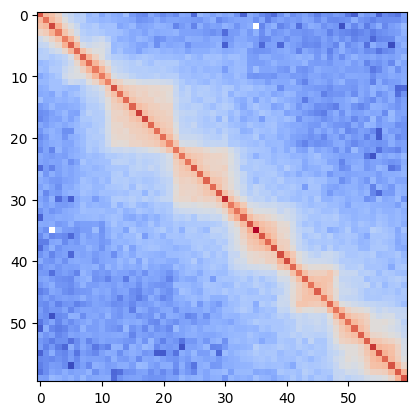

In [14]:
plt.imshow(np.log(m[120:180,120:180]),cmap='coolwarm')

**Описание:** Hi-C карта, которая показывает взаимодействие контактов внутри X хромосомы.


In [15]:
z=np.zeros(len(m)) # Создаём массив z, заполненный нулями и равный длине матрицы m
for i in range(len(m)): # Циклом проходимся по индексам от нуля до длины матрицы
  z[i]=np.nanmean(np.diagonal(m,i)) # Считаем среднее для диагонали, сдвинутой на i элементов от главной диагонали, при этом игнорируем nan значения

<ipython-input-15-fb4ad6a8632f>:3: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(m,i)) # Считаем среднее для диагонали, сдвинутой на i элементов от главной диагонали, при этом игнорируем nan значения


Text(0, 0.5, 'Частота контакта (количество)')

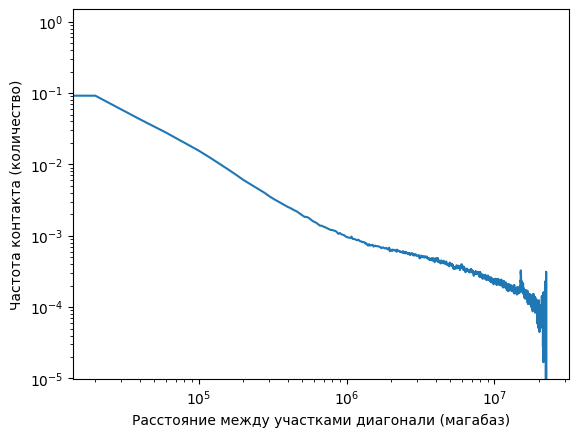

In [16]:
##!!! Мы вставили ниже 20000 (указанная раннее дистанция/разрешение), потому что нам нужно расстояние в логарифмическом масштабе, а не бины
plt.plot(np.arange(len(m))*20000,z) # Указываем x и y для графика
plt.xscale('log') # Устанавливаем логарифмическую шкалу для оси x (значения буду отображаться в логарифмическом масштабе)
plt.xlabel('Расстояние между участками диагонали (магабаз)') # Задаём название оси x
plt.yscale('log') # Устанавливаем логарифмическую шкалу для оси y (значения буду отображаться в логарифмическом масштабе)
plt.ylabel('Частота контакта (количество)') # Задаём название оси y

**Описание:** скейлинг график, который показывает, что участки, которые ближе всего друг к другу находятся, имеют более высокую частоту контакта. И чем дальше расстояние, тем ниже частота контакта.

## Построение дендрограммы реплик Hi-C для клеточных линий дрозофилы


*   HiC1 и HiC2 - bg3
*   HiC3 и HiC4 - kc167

In [18]:
binSize = 20000 # Размер бина - разрешение (resolution)
dBPMax = 5000000 # Максимальное расстояние между участками генома
bDownSample = True # Выравнивание реплик до суммарного контакта / уменьшение выборки
h=0 # Сглаживание (размер фильтра)

similarity_matrix = []
for i in [1,2,3,4]:
  scc_matrix = []
  for j in [1,2,3,4]:
    fmcool1 = f'drive/MyDrive/HSE_HiC_minor/HiC{i}.dm3.mapq_30.1000.mcool'
    fmcool2 = f'drive/MyDrive/HSE_HiC_minor/HiC{j}.dm3.mapq_30.1000.mcool'
    cool1, binSize1 = readMcool(fmcool1, binSize)
    cool2, binSize2 = readMcool(fmcool2, binSize)
    scc_matrix.append(np.nanmean(hicrepSCC(cool1, cool2, h, dBPMax, bDownSample)))
  similarity_matrix.append(scc_matrix)

/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return 

In [19]:
similarity_matrix

[[0.9997391757955137,
  0.6713708986506667,
  0.41768466731917386,
  0.39071800103894927],
 [0.6716903859807304, 1.0, 0.42592787955421746, 0.39475300089879406],
 [0.4173475946452255,
  0.42470139060699386,
  0.9997442455242966,
  0.6546638291090906],
 [0.39093731977741375, 0.39406073260973357, 0.6553095982859322, 1.0]]

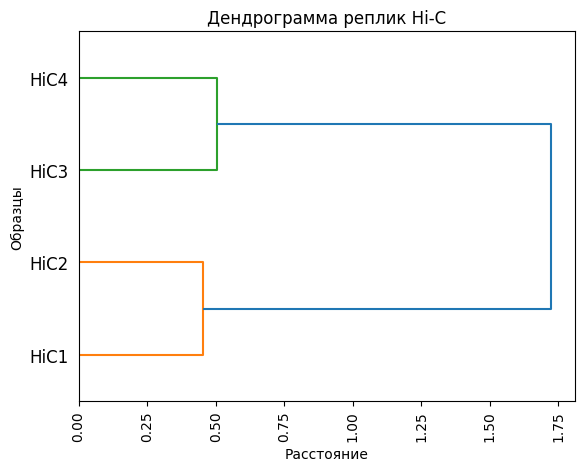

In [20]:
samples = ['HiC1','HiC2','HiC3','HiC4']
dendrogram = hierarchy.dendrogram(hierarchy.linkage(similarity_matrix, method='single', metric='correlation'), labels = samples, orientation='right')

plt.xlabel('Расстояние')
plt.xticks(rotation=90)

plt.ylabel('Образцы')

plt.title('Дендрограмма реплик Hi-C')

plt.show()

**Описание:** дендрограмма показывает, что реплики одной и той же клеточной линии имеют тенденцию быть ближе друг к другу по сравнению с разными типами клеток.